In [1]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import json

%matplotlib inline

In [47]:
folder_names = [r"/home/justin/Documents/rlkit/output/sawyer-reach-sim-2d/2019_05_10_14_40_05",
r"/home/justin/Documents/rlkit/output/sawyer-reach-sim-2d/2019_05_10_14_40_32",
r"/home/justin/Documents/rlkit/output/sawyer-reach-sim-2d/2019_05_10_14_40_54"             
               ]



In [48]:
def process_data(fname):
    file_name = fname + "/progress.csv"
    data = pd.read_csv(file_name)
    
    json_dict = json.load(open(fname + "/variant.json"))
    n_tasks = json_dict["env_params"]["n_tasks"]
    kl_lambda = json_dict["algo_params"]["kl_lambda"]
    label = "NTasks: {} | KL-Lambda: {}".format(n_tasks, kl_lambda)
    
    data["info"] = label
    return data
    
def plot(data, column_name):
    x = data[[column_name, "info"]]
    plt.figure(figsize=(12,8))
    sns.lineplot(x = x.index, y = x[column_name], hue=x["info"])

In [49]:
all_data = []
for fname in folder_names:
    all_data.append(process_data(fname))

/home/justin/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


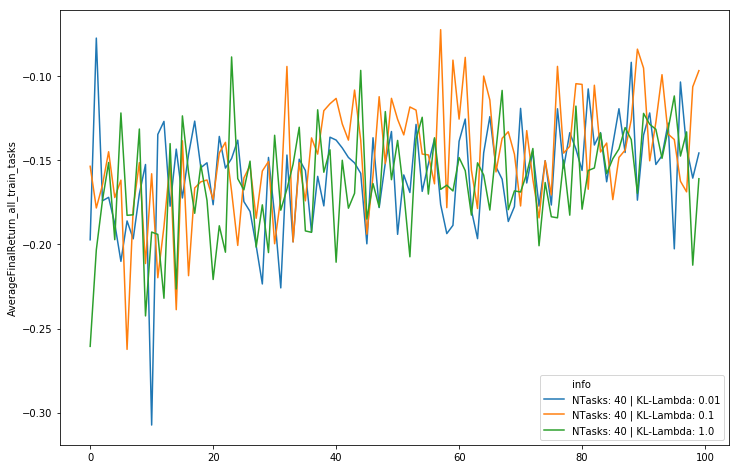

In [50]:
plot(pd.concat(all_data), "AverageFinalReturn_all_train_tasks")

/home/justin/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


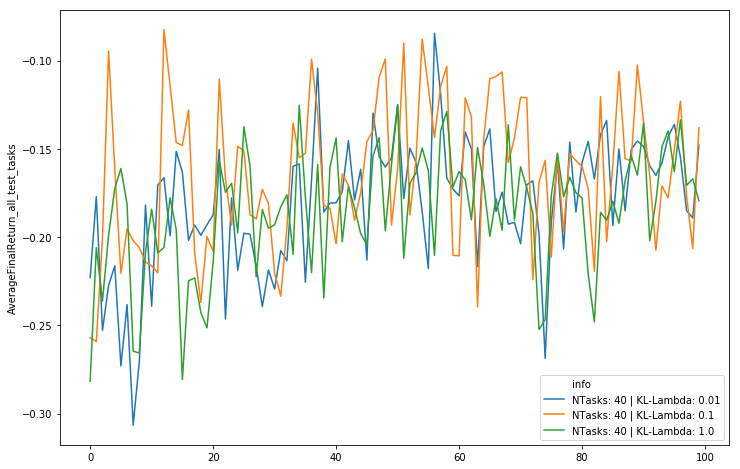

In [51]:
plot(pd.concat(all_data), "AverageFinalReturn_all_test_tasks")